In [1]:
%load_ext autoreload
%autoreload 2

In [57]:
from audio_file import read_samples, write_samples, read_concat_samples
from signal_processing.features import extract_features
from signal_processing.windowing import window_samples
from utils import get_files_of_types
import definitions

import pandas as pd
import random
import matplotlib.pyplot as plt
from IPython.display import Audio, display
import plotly.express as px
import os

from sklearn.cluster import KMeans
import numpy as np

In [3]:
files = get_files_of_types("E:/tsvr-samplepack-tools/data/raw/Brass", definitions.AUDIO_FILE_TYPES)
print(len(files))

72


In [31]:
def display_audio(samples, title="", rate=definitions.SAMPLE_RATE):
    display(Audio(samples, rate=rate))
    plt.title(title)
    plt.plot(samples)
    plt.show()

In [8]:
all_features = []
for f in files:
    print(f"loading sample {f}")
    samples = read_samples(f)
    features = extract_features(samples)
    all_features.append({'file' : f, **features})
    # display_audio(samples, f)
df_features = pd.DataFrame(all_features)

loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-b.wav


c:\Users\Carl\AppData\Local\Programs\Python\Python37\lib\site-packages\librosa\core\spectrum.py:224: UserWarning:

n_fft=1024 is too small for input signal of length=637



loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-b2.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-b3.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-b4.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-c.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-d.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-d2.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-d3.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-d4.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-d5.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-d6.wav
loading sample E:\tsvr

c:\Users\Carl\AppData\Local\Programs\Python\Python37\lib\site-packages\librosa\core\spectrum.py:224: UserWarning:

n_fft=1024 is too small for input signal of length=319

c:\Users\Carl\AppData\Local\Programs\Python\Python37\lib\site-packages\librosa\core\spectrum.py:224: UserWarning:

n_fft=1024 is too small for input signal of length=160



loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-g1.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-g2.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-g3.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-g4.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-g5.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-g6.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-g7.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-h.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-h1.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-h2.wav
loading sample E:\tsv

c:\Users\Carl\AppData\Local\Programs\Python\Python37\lib\site-packages\librosa\core\pitch.py:153: UserWarning:

Trying to estimate tuning from empty frequency set.



loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\extras\bass1a.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\extras\chord1.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\extras\chord2.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\extras\chord3.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\extras\loop1-130.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\extras\loop1a-130.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\extras\loop1b-130.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\extras\loop1c-130.wav
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\extras\loop1d-130.wav


In [50]:
win_size = 8192
hop_size = 8192

all_features = []
for f in files[:10]:
    print(f"loading sample {f}")
    samples = read_samples(f)
    windowed_samples = window_samples(samples, win_size, hop_size, window_type="rectangular")
    for i, win in enumerate(windowed_samples):
        win = np.nan_to_num(win)
        print(f"\textracting features for {f} window {i+1}/{len(windowed_samples)}")
        try:
            features = extract_features(win)
            all_features.append({'file' : f, 'window' : i, **features})
        except Exception as e:
            print(f"failed to extract features for {f} window {i} | {e}")
df_features = pd.DataFrame(all_features)

loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-b.wav
	extracting features for E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-b.wav window 1/9
	extracting features for E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-b.wav window 2/9


c:\Users\Carl\AppData\Local\Programs\Python\Python37\lib\site-packages\librosa\core\spectrum.py:224: UserWarning:

n_fft=1024 is too small for input signal of length=512

c:\Users\Carl\AppData\Local\Programs\Python\Python37\lib\site-packages\librosa\core\spectrum.py:224: UserWarning:

n_fft=1024 is too small for input signal of length=256

c:\Users\Carl\AppData\Local\Programs\Python\Python37\lib\site-packages\librosa\core\spectrum.py:224: UserWarning:

n_fft=1024 is too small for input signal of length=128

c:\Users\Carl\AppData\Local\Programs\Python\Python37\lib\site-packages\librosa\core\spectrum.py:224: UserWarning:

n_fft=1024 is too small for input signal of length=64



	extracting features for E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-b.wav window 3/9
	extracting features for E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-b.wav window 4/9
	extracting features for E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-b.wav window 5/9
	extracting features for E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-b.wav window 6/9
	extracting features for E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-b.wav window 7/9
	extracting features for E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-b.wav window 8/9
	extracting features for E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-b.wav window 9/9
loading sample E:\tsvr-samplepack-tools\data\raw\Brass\all_star_brass_sample_library\brass-b2.wav
	extracting features for E:\tsvr-samplepack-tools\data\raw\Brass\all_star_br

In [51]:
df_features

,file,window,mfccs,chroma,mel,contrast,tonnetz,rms
0,E:\tsvr-samplepack-tools\data\raw\Brass\all_st...,0,"[-232.01310913306943, 120.66579996402965, -60....","[0.3967990956683389, 0.6040027913429519, 0.573...","[0.06916610238547312, 0.08406706636959606, 0.0...","[11.418218421371284, 21.434380176587542, 18.93...","[-0.12113469813531813, -0.09364865493837603, -...",0.093245
1,E:\tsvr-samplepack-tools\data\raw\Brass\all_st...,1,"[-218.75316540602742, 162.86763747905246, -76....","[0.3673582767315697, 0.6508883557974113, 0.546...","[0.07110124407574413, 0.08588177312326024, 0.0...","[8.457770628196302, 21.472508962389583, 23.387...","[-0.2086500313730375, -0.10932808061650123, -0...",0.103662
2,E:\tsvr-samplepack-tools\data\raw\Brass\all_st...,2,"[-407.75539637418296, 195.98089724605978, -50....","[0.38789383230425073, 0.6777533738872594, 0.41...","[0.0013741447481546453, 0.0016602026793539994,...","[9.263397543333227, 19.328686487326586, 24.531...","[-0.24478137624737292, -0.0853214424163132, -0...",0.049890
3,E:\tsvr-samplepack-tools\data\raw\Brass\all_st...,3,"[-710.8304889576202, 218.62484354769717, -76.0...","[0.35104417338742266, 0.4611159957039425, 0.25...","[9.470949923443859e-06, 1.1231512271226472e-05...","[9.99957955077119, 20.34710488707536, 25.78276...","[-0.26628122920016867, -0.10708566490500211, -...",0.001479
4,E:\tsvr-samplepack-tools\data\raw\Brass\all_st...,4,"[-765.3906052310367, 219.95197881131745, -70.4...","[0.38949312873210207, 0.736205128313573, 0.377...","[1.5323365398007995e-07, 1.9012131479821353e-0...","[12.895074828648875, 20.301617979901327, 24.55...","[-0.2906495944221921, -0.06516533311125251, -0...",0.000841
...,...,...,...,...,...,...,...,...
85,E:\tsvr-samplepack-tools\data\raw\Brass\all_st...,4,"[-529.4832750746937, 296.9529808152008, -13.84...","[0.87121047278153, 0.7356934826910814, 0.78014...","[0.0013016305209247864, 0.025364898178201742, ...","[24.865992233920903, 8.298176301834491, 11.255...","[-0.0036712272228579383, -0.09576780984874379,...",0.009455
86,E:\tsvr-samplepack-tools\data\raw\Brass\all_st...,5,"[-568.8787458709991, 294.46450158904486, -11.5...","[0.6836193932789323, 0.6318128169176017, 0.717...","[0.001748108408210426, 0.003922891403649032, 0...","[24.418024482060755, 9.568284776529012, 11.761...","[-0.010877294323543809, -0.12246770696059857, ...",0.006150
87,E:\tsvr-samplepack-tools\data\raw\Brass\all_st...,6,"[-613.9826209043803, 303.6667905041437, -3.885...","[0.768670326675118, 0.7638675100410028, 0.7445...","[0.0013982124956125345, 0.0037272307679029077,...","[24.423810243072523, 7.1346853522496385, 13.16...","[-0.036506461677983874, -0.10357778253466275, ...",0.004742
88,E:\tsvr-samplepack-tools\data\raw\Brass\all_st...,7,"[-653.5757431210101, 307.41329899704033, 5.259...","[0.7899101434831105, 0.7995901406969819, 0.827...","[0.00010502415790768129, 0.002157423116784127,...","[24.422167517101066, 7.888165321937837, 12.540...","[-0.09245950713868258, -0.14844447502242786, -...",0.003383


In [52]:
def kmeans_quantize_distances(df, cluster_by, cluster_ratio=0.3):
    new_df = df.copy()
    X = np.array([np.asarray(x) for x in df[cluster_by]])
    K = int(len(X) * cluster_ratio)
    kmeans = KMeans(n_clusters=K, random_state=0).fit(X)
    transformed = kmeans.transform(X)
    labels = np.argmin(transformed, axis=1)
    for idx, label in enumerate(labels):
        new_df.loc[idx, 'label'] = label
        new_df.loc[idx, 'distance'] = transformed[idx, label]
    return new_df

df_dists = kmeans_quantize_distances(df_features, 'mfccs', 0.1)
# df_dists[df_dists.label == 4].sort_values('distance', ascending=True)

In [53]:
key = "mfccs"
df_dists = kmeans_quantize_distances(df_features, key, 0.1)

key_pos = "mfccs"
x_idx = 0
y_idx = 1
z_idx = 2

df_fig = df_dists.copy()

df_fig['x'] = df_fig[key_pos].apply(lambda x: x[x_idx])
df_fig['y'] = df_fig[key_pos].apply(lambda x: x[y_idx])
df_fig['z'] = df_fig[key_pos].apply(lambda x: x[z_idx])

px.scatter_3d(df_fig, x='x', y='y', z='z', color='label', size="rms", opacity=0.5, hover_data=['file', 'distance'])

We could do several things
- take the n closest to center of each cluster
* - within a cluster, find the permutation of distances that is the largest, with a given N

In [61]:
import itertools


# make a function to find the most optimal distances between vectors in the same K label
def find_optimal_distances(df, key, k):
    df_k = df[df.label == k]
    distances = []
    for i, j in itertools.combinations(range(len(df_k)), 2):
        # distances.append(np.linalg.norm(df_k.iloc[i][key] - df_k.iloc[j][key]))
        distances.append({'dist' : np.linalg.norm(df_k.iloc[i][key] - df_k.iloc[j][key]),
                          'i' : i,
                          'j' : j,
                          'file_i' : os.path.basename(df_k.iloc[i]['file']),})
    return pd.DataFrame(distances).sort_values('dist', ascending=False)

def filter_optimal_distances(df, key, k, min_dist, max_dist):
    df_k = df[df.label == k]
    distances = []
    for i, j in itertools.combinations(range(len(df_k)), 2):
        dist = np.linalg.norm(df_k.iloc[i][key] - df_k.iloc[j][key])
        print(dist)
        if dist > min_dist and dist < max_dist:
            distances.append({'dist' : dist,
                              'i' : i,
                              'j' : j,
                              'file_i' : os.path.basename(df_k.iloc[i]['file']),})
    print(distances)
    return pd.DataFrame(distances).sort_values('dist', ascending=False)

# df_optimal = find_optimal_distances(df_dists, 'mfccs', 4)
# df_optimal


df_filtered = filter_optimal_distances(df_dists, 'mfccs', 4, 0.5, 1.5)
df_filtered

42.553650509942834
71.8788146133743
107.1512796552918
81.48908757623943
91.5576127637153
108.53575919717554
129.25015093963944
92.28107153846909
91.03799973650153
111.76089294023025
137.46819274873334
74.05651015215015
38.55074052232767
72.45932348166114
97.10259707607614
90.588402241325
95.12970117315713
104.51360799609016
97.45833618804296
83.88202467290785
93.12498473736794
112.1235319551319
72.66288990590658
44.43400526753981
111.2516112669669
92.45709497997186
85.02067316925286
84.93143991543188
106.27194705685957
87.22701222443257
81.26214884989461
91.8161502285695
80.98127546414652
140.73310593833784
115.53704415196802
95.7919237896566
73.60229065894363
134.08408681688354
110.78110061784716
92.7922079860267
86.20957115878575
113.7385607778718
47.559381960186876
78.67167400224857
118.98843393599658
102.510723648224
106.58163794185221
128.41452084539475
154.6051299912622
74.15164555929871
40.42698246209143
84.59217576074133
109.22633107213345
102.34454046931283
112.66809540253085


KeyError: 'dist'

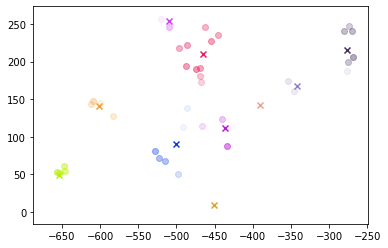

In [183]:
df = df_features.copy()
key = "mfccs"
subset_size = 0.2

# Convert list of vectors to numpy array
X = np.array([np.asarray(x) for x in df[key]])
# X = X[:, :2]
K = int(len(X)*subset_size)

kmeans = KMeans(n_clusters=K, random_state=0).fit(X)

transformed = kmeans.transform(X)
labels = np.argmin(transformed, axis=1)

sorted_dists = {}

for idx, label in enumerate(labels):
    if label not in sorted_dists:
        sorted_dists[label] = [{'distance' : transformed[idx, label] , 'row' : df.iloc[idx] }]
    else:
        sorted_dists[label].append({'distance' : transformed[idx, label], 'row' : df.iloc[idx]})

for label in range(K):
    sorted_dists[label] = sorted(sorted_dists[label], key=lambda x: x['distance'])

for label, center in enumerate(kmeans.cluster_centers_):
    color = np.random.rand(3,)
    plt.scatter(center[0], center[1], color=color, marker='x', alpha=1)

    max_dist = sorted_dists[label][-1]['distance']

    for sd in sorted_dists[label]:
        x = sd['row'][key][0]
        y = sd['row'][key][1]
        plt.scatter(x, y, color=color, marker='o', alpha = 1-(sd['distance']/max_dist))

plt.show()

In [56]:
# bing


def kmeans_subselection(df, key, subset_size):
    # Convert list of vectors to numpy array
    X = np.array([np.asarray(x) for x in df[key]])
    # Run kmeans clustering
    kmeans = KMeans(n_clusters=int(len(X)*subset_size), random_state=0).fit(X)
    # Get the indices of the most dissimilar vectors
    indices = np.argpartition(kmeans.transform(X), -int(len(X)*subset_size), axis=0)[-int(len(X)*subset_size):]
    # Return the most dissimilar vectors
    print(f'LENGTH OF INDICES: {len(indices)} | idx: {indices}')
    selected = [df.iloc[i] for i in indices]
    return pd.DataFrame([x.to_dict() for x in selected])

# chatgpt

def select_dissimilar_vectors(vectors, subset_size):
    # Convert list of vectors to numpy array
    X = np.array(vectors)
    # Initialize KMeans clustering algorithm
    kmeans = KMeans(n_clusters=int(subset_size*len(vectors)), random_state=0).fit(X)
    # Get the cluster labels for each vector
    labels = kmeans.predict(X)
    # Compute the centroid of each cluster
    centroids = kmeans.cluster_centers_
    # Compute the distance of each vector to its centroid
    distances = [np.linalg.norm(X[i]-centroids[labels[i]]) for i in range(len(vectors))]
    # Sort the vectors by their distance to centroid
    sorted_vectors = [vector for _, vector in sorted(zip(distances, vectors))]
    # Return a subset of the most dissimilar vectors
    return sorted_vectors[:int(subset_size*len(vectors))]